# Libraries

In [2]:
import gdown
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Load the Data

In [4]:
train_file_id = '1TNipNtZ3h6xUOJHBKcCF6gwSiUpyh-vl'
train_output_file = 'Dataset3/Activity_Calories_EDA.csv'

train_download_url = f'https://drive.google.com/uc?id={train_file_id}'

gdown.download(train_download_url, train_output_file, quiet=False)

df = pd.read_csv(train_output_file)

Downloading...
From: https://drive.google.com/uc?id=1TNipNtZ3h6xUOJHBKcCF6gwSiUpyh-vl
To: c:\Users\firma\Documents\Python\Bangkit\Daily Activity Estimation\Dataset3\Activity_Calories_EDA.csv
100%|██████████| 701k/701k [00:04<00:00, 173kB/s]


# EDA

## Histogram Plot

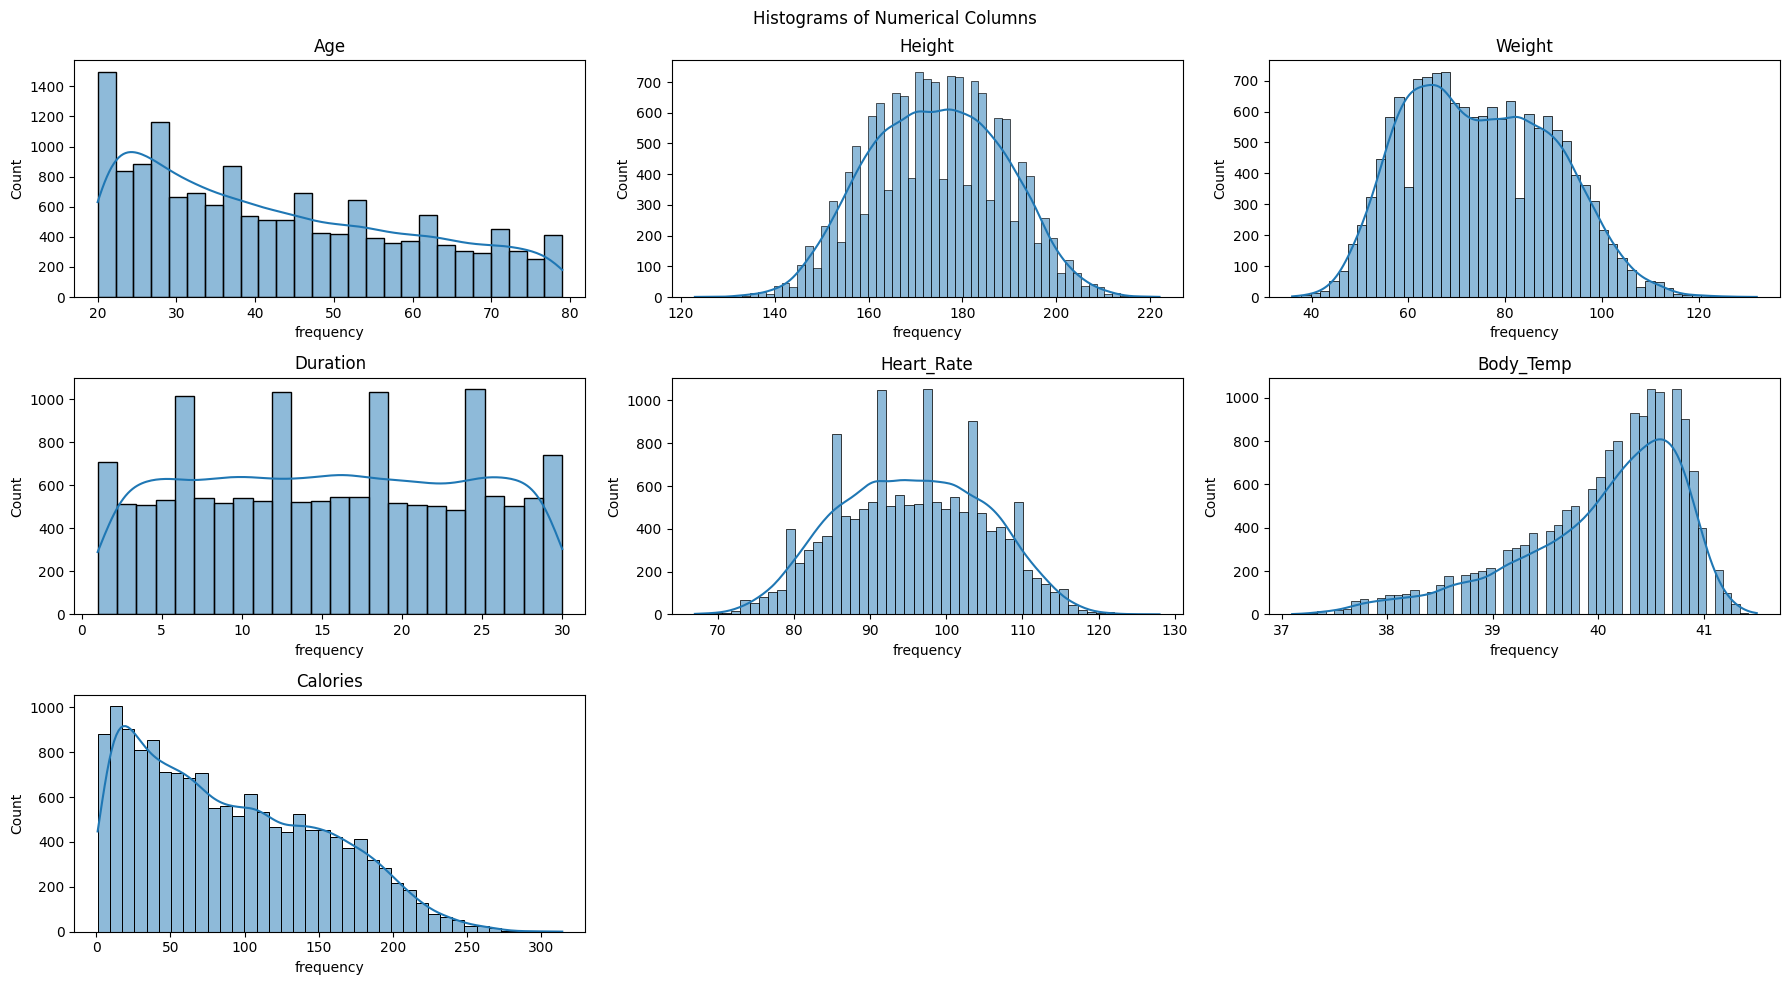

In [ ]:
columns = [col for col in df.columns if df[col].dtype in ['float64', 'int64'] and col not in ['Unnamed: 0']]
fig, axes = plt.subplots(3,3, figsize=(18,10))
axes = axes.flatten()

for i, col in enumerate(columns):
    ax = sns.histplot(x = df[col], ax = axes[i], kde = True)
    ax.set_title(col)
    ax.set_xlabel('frequency')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Histograms of Numerical Columns")
plt.tight_layout()
plt.show()

## Boxplot

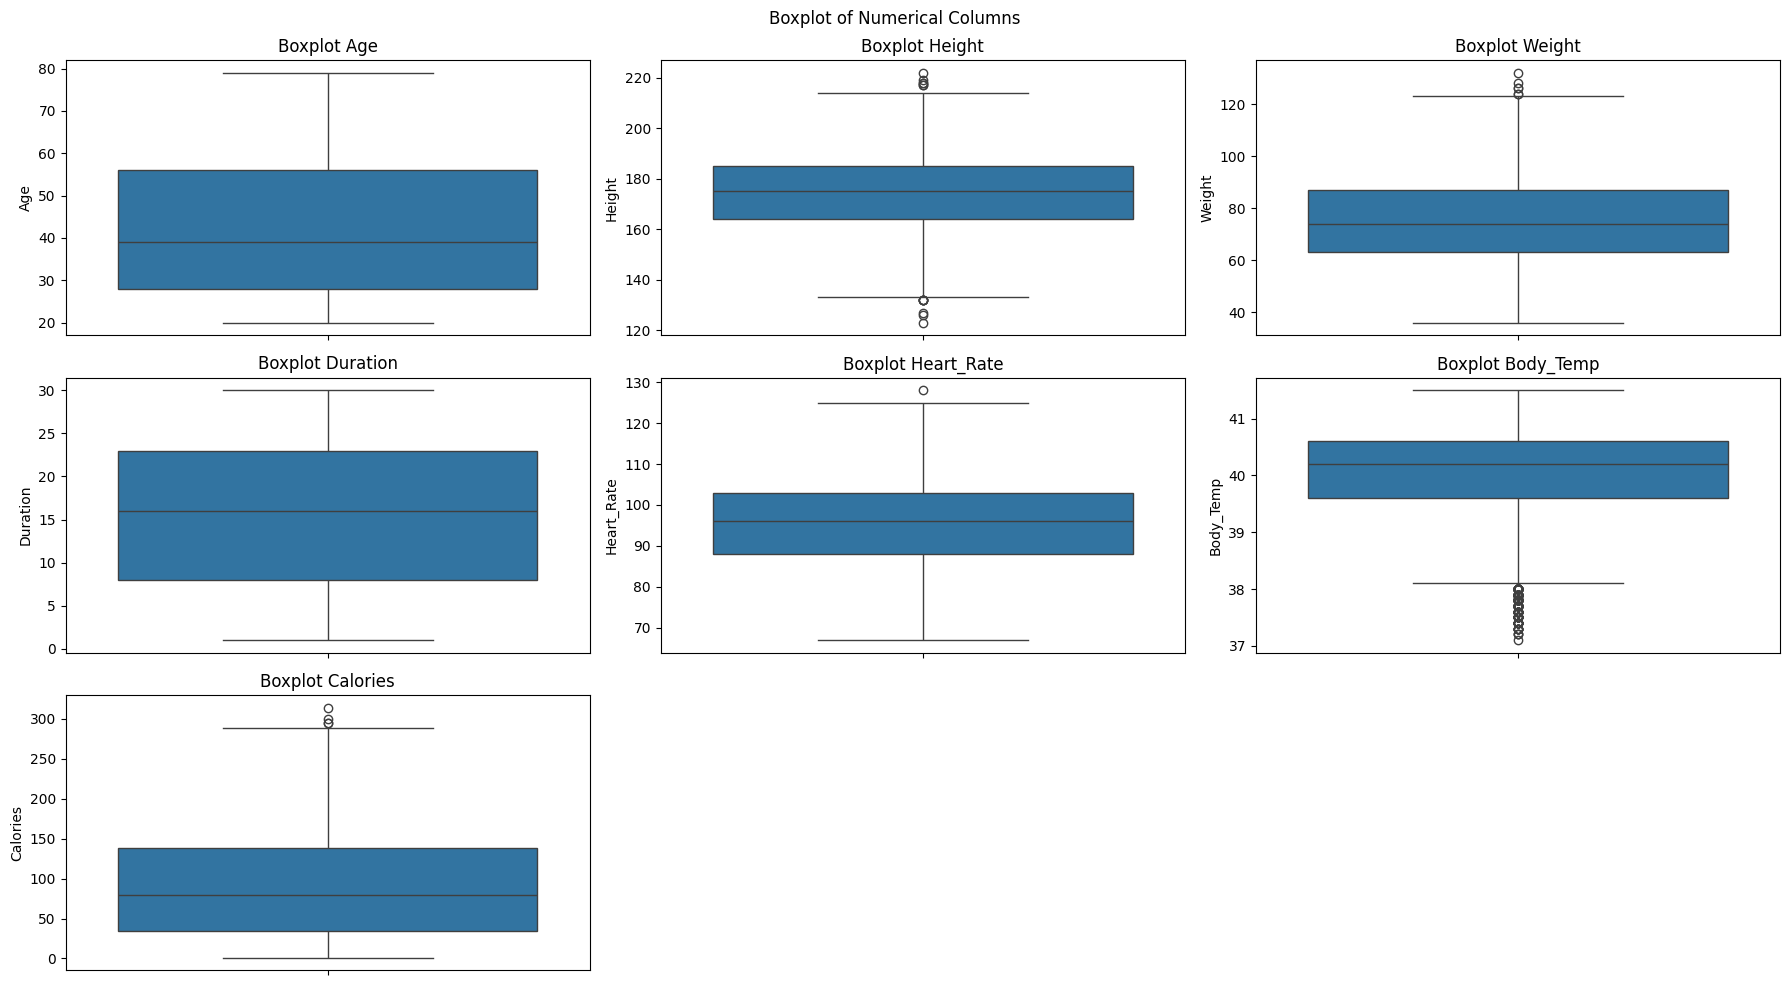

In [13]:
fig, axes = plt.subplots(3,3, figsize=(18,10))
axes = axes.flatten()

for i, var in enumerate(columns):
    ax = sns.boxplot(y=df[var], ax=axes[i])
    ax.set_title(f'Boxplot {var}')
    ax.set_ylabel(var)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Boxplot of Numerical Columns")
plt.tight_layout()
plt.show()

## Pie Plot and Countplot

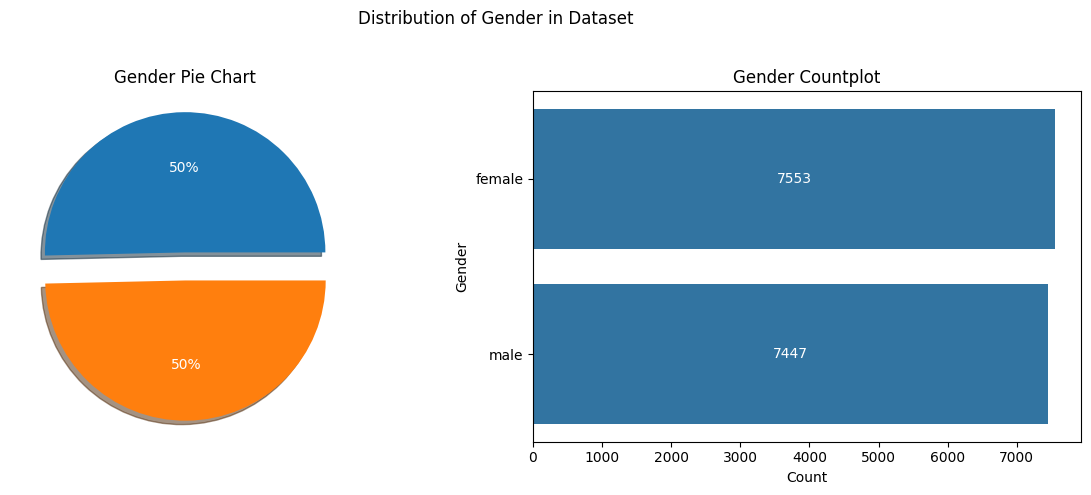

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ax = axes[0]
ax.pie(
    df['Gender'].value_counts(),
    shadow=True,
    explode=[0.1 for _ in range(df['Gender'].nunique())],
    autopct='%1.f%%',
    textprops={'color': 'white'}
)
ax.set_aspect('equal')
ax.set_title('Gender Pie Chart')

ax1 = axes[1]
sns.countplot(y='Gender', ax=ax1, order=df['Gender'].value_counts().index, data=df)
ax1.set_xlabel('Count')
ax1.set_ylabel('Gender')
ax1.set_title('Gender Countplot')

total = len(df['Gender'])
for p in ax1.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() / 2
    ax1.text(x, y, f'{int(p.get_width())}', ha='center', va='center', color='white')

fig.suptitle('Distribution of Gender in Dataset\n')

plt.tight_layout()
plt.show()


## Correlation Matrix

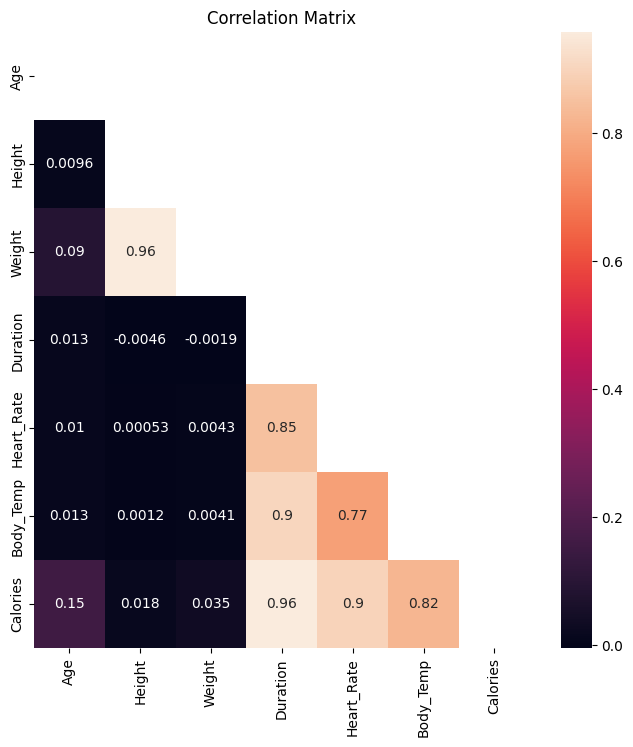

In [12]:
columns = [col for col in df.columns if df[col].dtype in ['float64', 'int64'] and col not in ['Unnamed: 0']]

corr = df[columns].corr()
plt.figure(figsize=(8, 8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot=True)
plt.title('Correlation Matrix')
plt.show()